In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
discrete_feature=['number_project','time_spend_company','Work_accident','promotion_last_5years']
continuous_feature = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
categorical_feature = ['left','Department','salary']

In [52]:
discrete_feature

['number_project',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [53]:
continuous_feature

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

In [54]:
categorical_feature

['left', 'Department', 'salary']

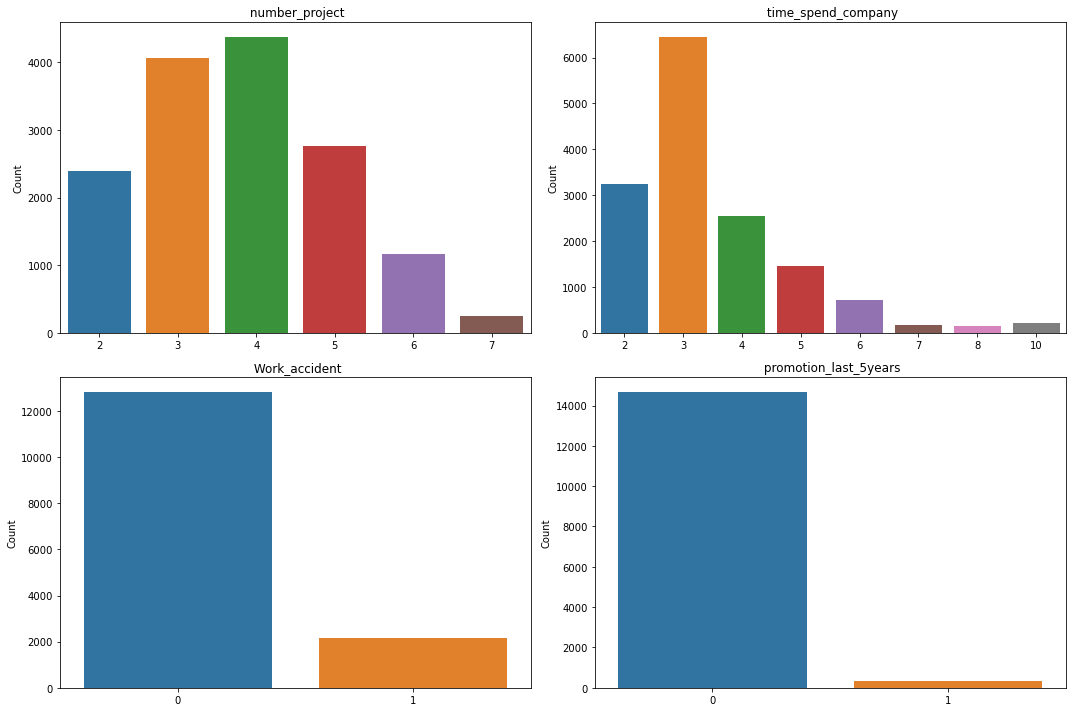

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(discrete_feature):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f' {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

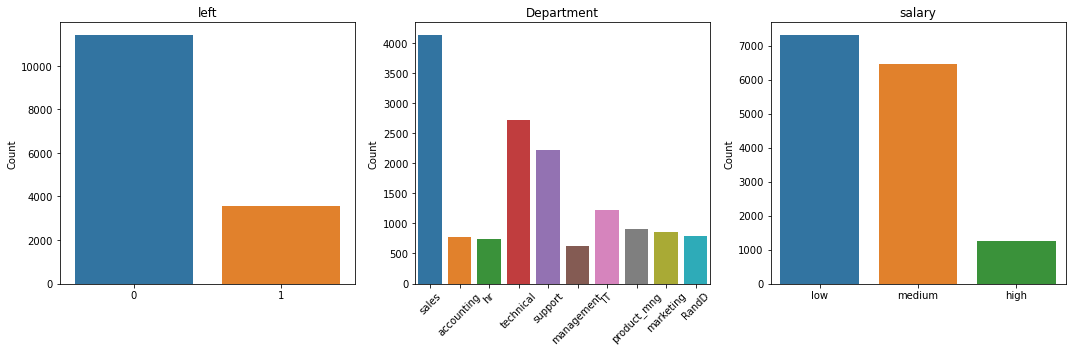

In [56]:
fig, axes = plt.subplots(1,3,figsize=(15, 5))

for i, feature in enumerate(categorical_feature):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_13552/3926147696.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_13552/3926147696.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
C:\Users\Lenovo\Ap

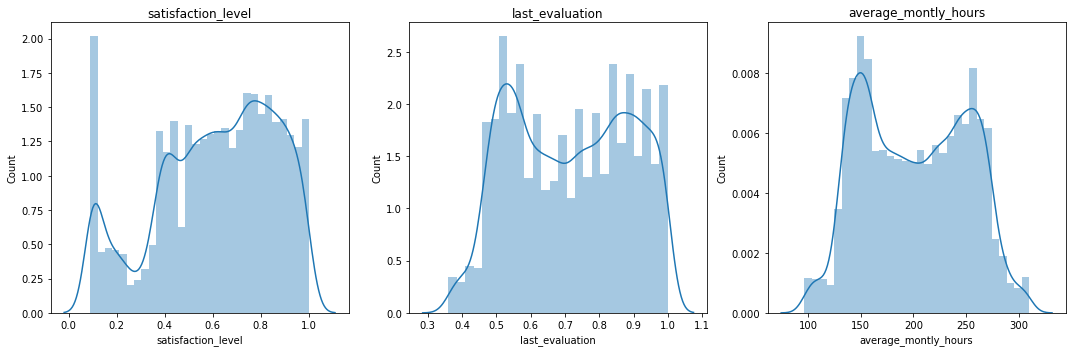

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, feature in enumerate(continuous_feature):
    sns.distplot(df[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].set_title(feature)

fig.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 6, not 7

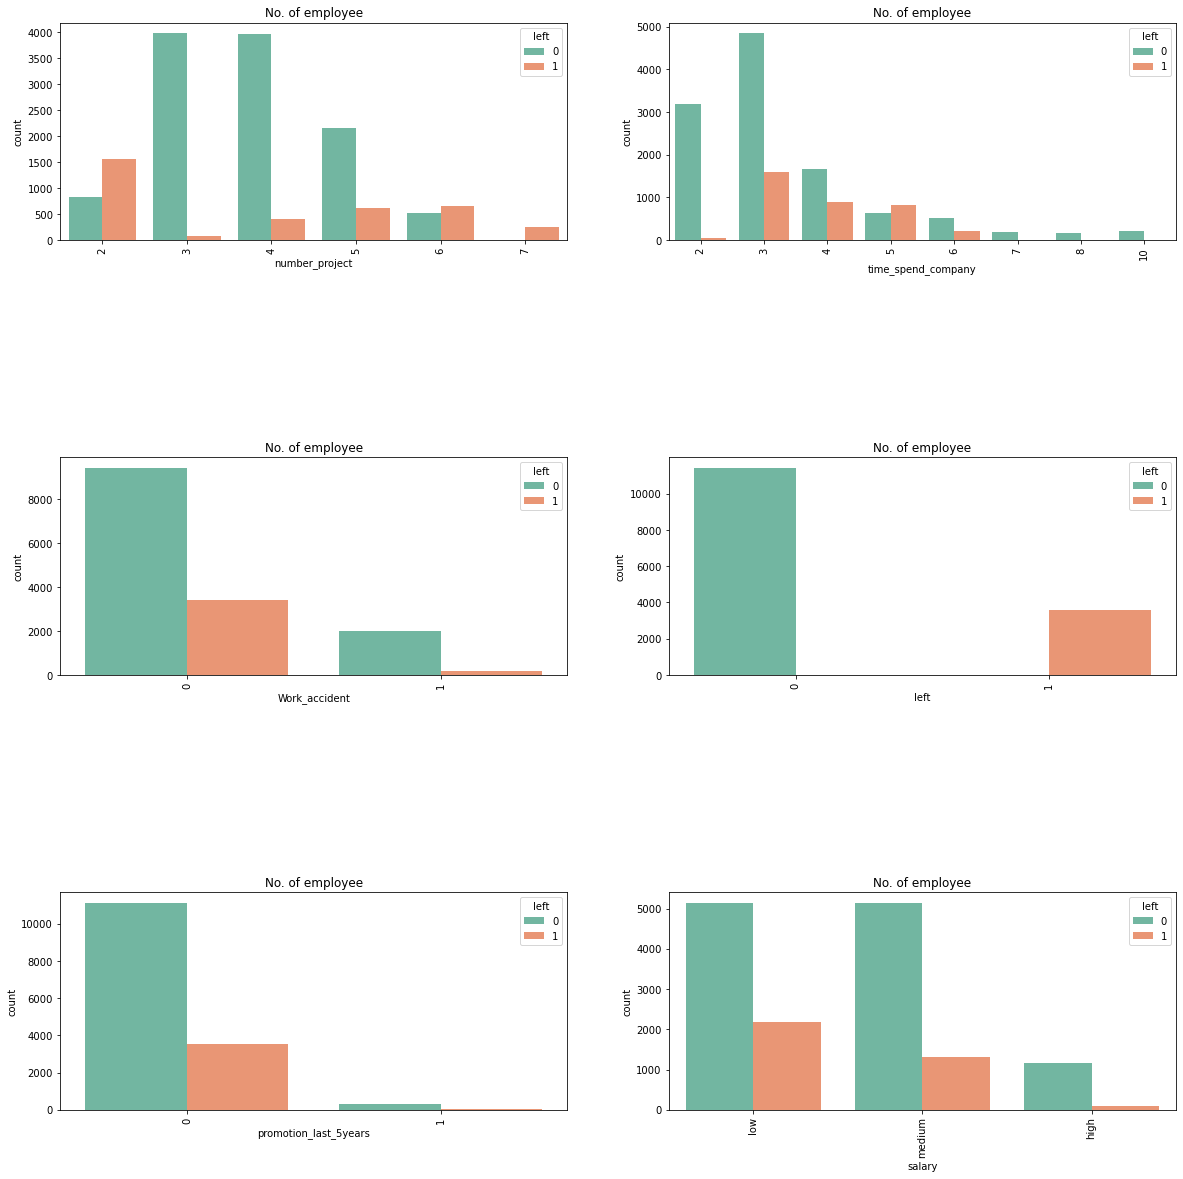

In [58]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','salary','average_monthly_hours']
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features):
        plt.subplot(3,2, i+1)       
        plt.subplots_adjust(hspace = 1.0)
        sns.countplot(x=j,data = df, hue='left',palette='Set2')
        plt.xticks(rotation=90)
        plt.title("No. of employee")

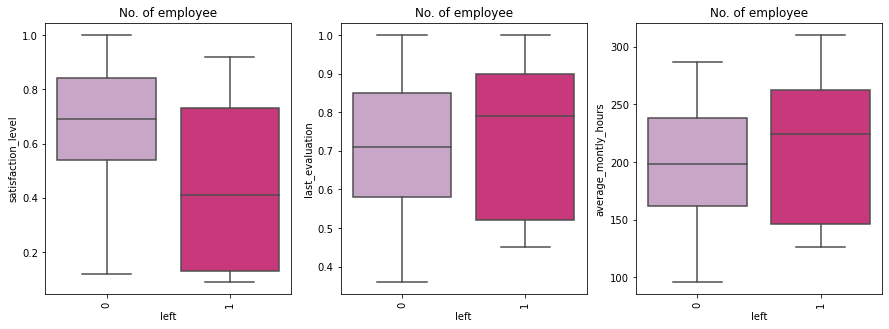

In [59]:
fig=plt.subplots(figsize=(15,5))

for i, j in enumerate(continuous_feature):
        plt.subplot(1, 3, i+1)       
        plt.subplots_adjust(hspace = 1.0)
        sns.boxplot(x='left',y=j,data = df,palette = 'PuRd')
        plt.xticks(rotation=90)
        plt.title("No. of employee")

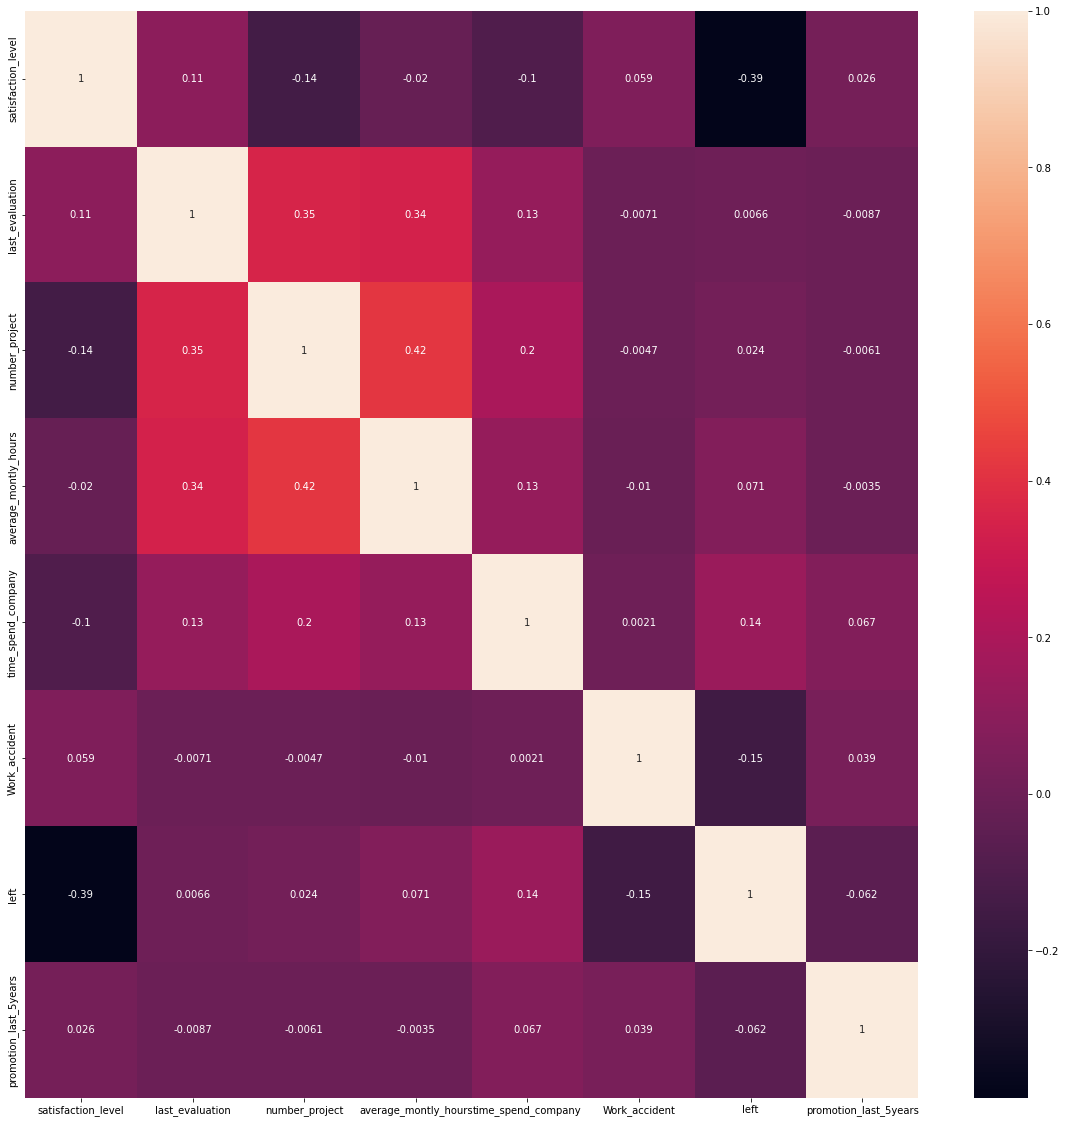

In [60]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

## Data Preprocessing

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

var1 = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']
for var in var1:
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [64]:
X = df.drop('left',axis=1)
Y = df['left']

In [65]:
from sklearn.ensemble import ExtraTreesRegressor

selector = ExtraTreesRegressor()
selector.fit(X,Y)

ExtraTreesRegressor()

<BarContainer object of 9 artists>

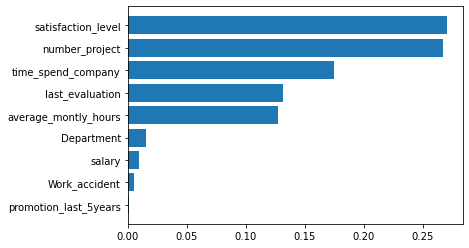

In [66]:
feature_imp = selector.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_imp})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

## Model Building

In [67]:
X = df.drop('left',axis=1)
Y = df['left']

In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test,Y_pred_lr))
print(accuracy_score(Y_test,Y_pred_lr))
print(classification_report(Y_test,Y_pred_lr))

[[3161  267]
 [ 817  255]]
0.7591111111111111
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [72]:
print(confusion_matrix(Y_test,Y_pred_rf))
print(accuracy_score(Y_test,Y_pred_rf))
print(classification_report(Y_test,Y_pred_rf))

[[3420    8]
 [  45 1027]]
0.9882222222222222
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
Y_pred_gb = gb.predict(X_test)

In [74]:
print(confusion_matrix(Y_test,Y_pred_gb))
print(accuracy_score(Y_test,Y_pred_gb))
print(classification_report(Y_test,Y_pred_gb))

[[3385   43]
 [  85  987]]
0.9715555555555555
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Prediction

In [75]:
X_new=[[0.67,0.86,3,262,6,0,0,7,1]]

In [76]:
print(rf.predict(X_new))

[0]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [77]:
X_new=[[0.12,0.20,3,211,3,0,0,5,1]]
print(rf.predict(X_new))

[1]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
